In [23]:
import numpy as np
from model import LotkaVolterraModel
from summstats import LotkaVolterraStats

import matplotlib.pyplot as plt

import delfi.distribution as dd
import delfi.generator as dg
import delfi.inference as infer
from delfi.utils.viz import plot_pdf

%run -i ../../DDELFI.py

from parameters import ParameterSet

%matplotlib notebook

In [24]:
params = ParameterSet({})

params.seed = 42

params.model = ParameterSet({})
params.model.dt = 0.2
params.model.T = 30

params.logparam_limits = [(-5,-2), (-5,1), (-5,1), (-5,-2)]

params.true_params = np.log([0.01, 0.5, 1, 0.01])

params.res = ParameterSet({})
params.res.n_hiddens = [20,20]
params.res.convert_to_T = None#3
params.res.pilot_samples = 1000
params.res.svi = False

params.train = ParameterSet({})
params.train.n_train = 5000
params.train.n_rounds = 2

params.n_cores = 2

In [25]:
mlist = [ LotkaVolterraModel(dt=params.model.dt, T=params.model.T, seed=params.seed + i) for i in range(params.n_cores) ]
m = mlist[0]
param_limits = np.array(params.logparam_limits).T

p = dd.Uniform(*param_limits)
s = LotkaVolterraStats()

sample = m.gen_single(params.true_params)
params.obs_stats = s.calc([sample])[0]

In [26]:
def plot_sample(m, theta, s=None):
    fig = plt.figure()
    
    xlist = np.arange(0, m.T + m.dt, m.dt)
    
    sample = m.gen_single(theta)
    states = sample['data']
    
    for var in states:
        plt.plot(xlist, var)
        
    plt.show()
    
    if s is not None:
        print(s.calc([sample])[0])
    

<IPython.core.display.Javascript object>


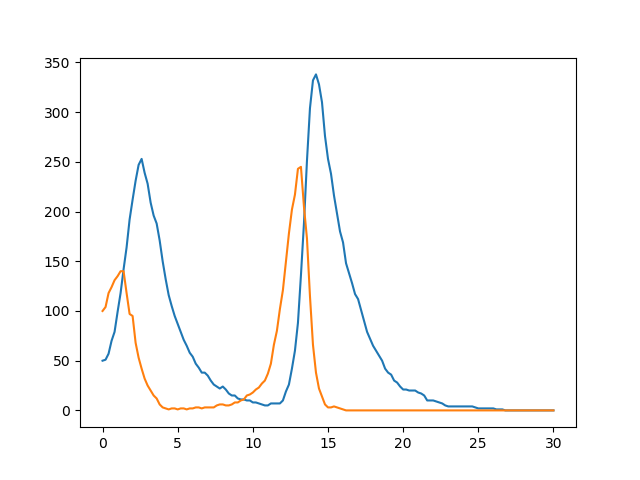

[    68.63576159     27.66225166   7624.20644592   2994.49183223
  12189.88741722  11937.1986755    3650.7615894    3467.96688742
   3095.69536424]


In [27]:
plot_sample(m, params.true_params, s)

In [28]:
g = dg.MPGenerator(models=mlist, prior=p, summary=s)

In [21]:
res = DDELFI(generator=g, 
                 obs=[params.obs_stats],
                 seed=params.seed, 
                 **params.res)

ret = res.run(**params.train)

posteriors = ret[2]

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.17535257]: : 13it [00:00, 93.28it/s] 

loss=[ 0.07911396]: : 2050it [00:15, 131.49it/s]


In [ ]:
for posterior in posteriors[-1:]:
    plot_pdf(posterior, lims=params.logparam_limits, gt=params.true_params)

In [14]:
params.save(url='setup.prm')

<IPython.core.display.Javascript object>


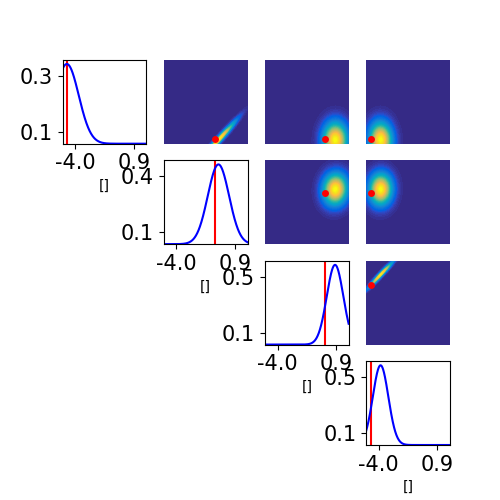

(<matplotlib.figure.Figure at 0x109ae94a8>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109af46a0>,
         <matplotlib.axes._subplots.AxesSubplot object at 0x109e19c50>]], dtype=object))

In [20]:
import dill

with open('gt_mm.pkl', 'rb') as gt_file:
    gt_post = dill.load(gt_file)

plot_pdf(gt_post, lims = params.logparam_limits, gt=params.true_params, ticks=True)

In [44]:
%run run_abc.py

samples, lweights, _, _ = run_smc(mlist, p, s, params.obs_stats, n_params=p.ndim, 
                                  eps_last=0.01, eps_decay=0.9, n_particles=1000)

iteration = 0, eps = 2.0, ess = 100.00%, nsims = 38235, time = 1:05:13.521146
iteration = 1, eps = 1.8, ess = 90.02%, nsims = 40999, time = 1:48:57.446867
iteration = 2, eps = 1.6, ess = 83.51%, nsims = 43512, time = 2:30:19.885922
iteration = 3, eps = 1.5, ess = 87.76%, nsims = 45824, time = 3:11:26.825106
iteration = 4, eps = 1.3, ess = 85.75%, nsims = 48366, time = 3:52:51.954571
iteration = 5, eps = 1.2, ess = 85.86%, nsims = 50855, time = 4:32:52.993568
iteration = 6, eps = 1.1, ess = 83.01%, nsims = 53397, time = 5:13:15.392252
iteration = 7, eps = 0.96, ess = 83.68%, nsims = 55839, time = 5:53:10.001243
iteration = 8, eps = 0.86, ess = 82.45%, nsims = 58236, time = 6:33:19.026961
iteration = 9, eps = 0.77, ess = 86.72%, nsims = 60821, time = 7:14:07.695250
iteration = 10, eps = 0.7, ess = 85.59%, nsims = 63197, time = 7:54:05.117094
iteration = 11, eps = 0.63, ess = 86.96%, nsims = 65725, time = 8:34:32.917784
iteration = 12, eps = 0.56, ess = 80.55%, nsims = 68130, time = 9:14:

<IPython.core.display.Javascript object>


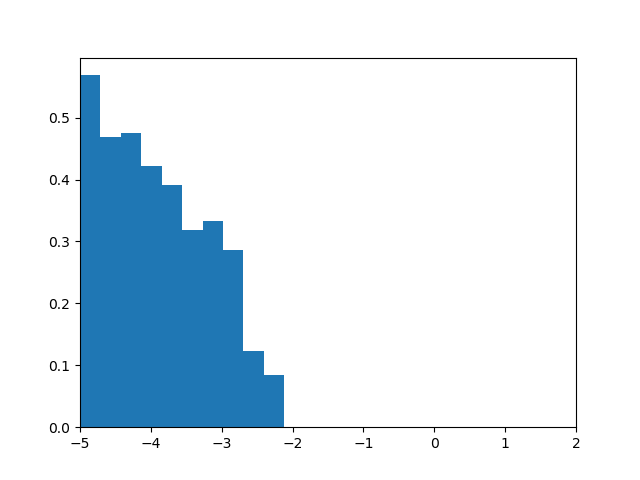

<IPython.core.display.Javascript object>


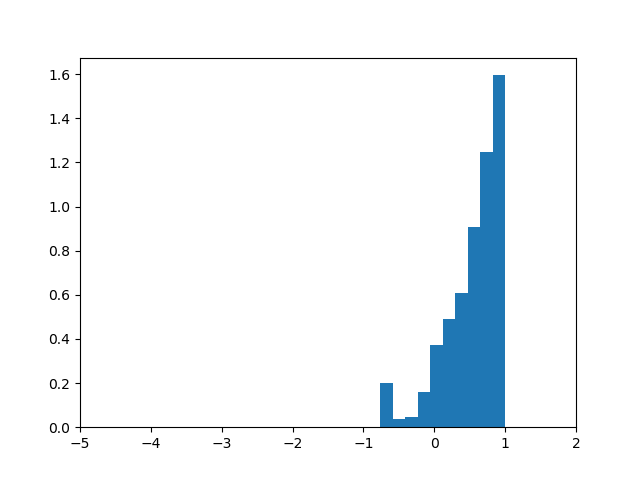

<IPython.core.display.Javascript object>


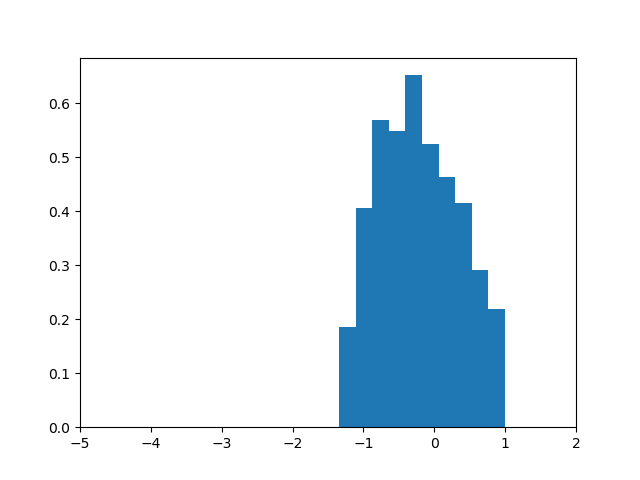

<IPython.core.display.Javascript object>


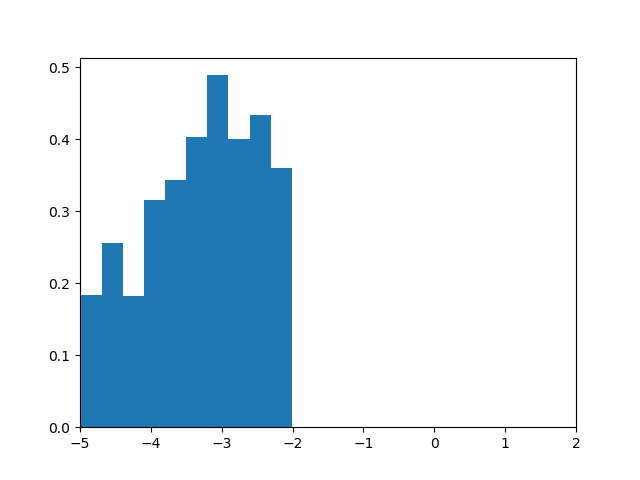

In [45]:
import matplotlib.pyplot as plt

xlist = np.linspace(-5, 2, 100)

for i in range(4):
    plt.figure()
    
    ax = plt.gca()
    
    ax.hist(samples[-1][:,i], weights=np.exp(lweights[-1]), normed=True)
    ax.set_xlim((-5, 2))

    plt.show()